# Creating Basic Visualization in Python

Now that we've learned about how to wrangle our data effectively, it's time to learn how to visualize them.

On top of the Python packages we import for data wrangling, we are also now importing **matplotlib** which is a _"comprehensive library for creating static, animated, and interactive visualizations in Python""_.

<table><td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width=500/></td><td><img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/1280px-NumPy_logo_2020.svg.png' width = 500/></td><tr><td colspan = 2><img src="https://matplotlib.org/_static/logo2_compressed.svg" width=500/></td></tr></table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("data/PH-HRIR-merged.csv")
df.head()

<ipython-input-2-188d2657e85c>:1: DtypeWarning: Columns (60,70,211,266,330,331,381,445,475,476,477,485,551,570,580,606) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/PH-HRIR-merged.csv")


,CASEID,V000,V001,V002,V003,V004,V005,V006,V007,V008,V008A,V009,V010,V011,V012,V013,V014,V015,V016,V018,V019,V019A,V020,V021,V022,V024,V025,V027,V028,V030,V034,V042,V044,V045A,V045B,V045C,V046,V023,V101,V102,V104,V105,V105A,V106,V107,V113,V115,V116,V119,V120,V121,V122,V123,V124,V125,V127,V128,V129,V130,V131,V133,V135,V136,V137,V138,V139,V140,V149,V150,V151,V152,V153,AWFACTT,AWFACTU,AWFACTR,AWFACTE,AWFACTW,V157,V158,V159,V160,V161,V169A,V169B,V170,V171A,V171B,V190,V191,V190A,V191A,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V235,V237,V238,V244,V301,V302A,V312,V313,V315,V316,V317,V318,V319,V320,V321,V322,V325A,V326,V327,V337,V361,V362,V363,V364,V367,V376,V376A,V379,V380,V384A,V384B,V384C,V384D,V393,V393A,V394,V395,V3A00Y,V3A00Z,V3A01,V3A02,V3A03,V3A04,V3A05,V3A06,V3A07,V3A08A,V3A08B,V3A08C,V3A08D,V3A08E,V3A08F,V3A08G,V3A08H,V3A08I,V3A08J,V3A08K,V3A08L,V3A08M,V3A08N,V3A08P,V3A08Q,V3A08R,V3A08S,V3A08T,V3A08U,V3A08V,V3A08X,V3A08Z,V401,V404,V405,V406,V415,V416,V417,V418,V418A,V426,V447,V463A,V463B,V463C,V463D,V463E,V463F,V463G,V463H,V463I,V463X,V463Z,V463AA,V463AB,V464,V465,V467B,V467C,V467D,V467F,V468,V501,V502,V503,V504,V507,V508,V509,V510,V511,V512,V513,V525,V527,V528,V529,V530,V531,V532,V535,V536,V537,V602,V603,V604,V605,V613,V614,V616,V621,V623,V624,V625,V626,V625A,V626A,V627,V628,V629,V632,V632A,V633B,V701,V702,V704,V704A,V705,V714,V714A,V715,V716,V717,V719,V729,V730,V731,V732,V739,V741,V743A,V743B,V743D,V743F,V744A,V744B,V744C,V744D,V744E,V745A,V745B,V746,V750,V751,V754CP,V754DP,V754JP,V754WP,V756,V761,V762,V763A,V763B,V763C,V766A,V766B,V767A,V774A,V774B,V774C,V777A,V781,V783,V784A,V784B,V784C,V784D,V784E,V784F,V784K,V784L,V784M,V784N,V784O,V784X,V791A,V822,V823,V824,V825,V826A,V828,V829,V833A,V834A,V836,V850A,V850B,V852A,V853A,V857A,V857B,V857C,V857D,V858,V801,V802,V803,V804,V805,V811,V812,V813,V814,V815A,V815B,V815C,D005,D101A,D101B,D101C,D101D,D101E,D102,D103A,D103B,D103C,D103D,D103E,D103F,D103G,D104,D105A,D105B,D105C,D105D,D105E,D105F,D105H,D105I,D105J,D105K,D106,D107,D108,D109,D110A,D110B,D110D,D110E,D110F,D110G,D111,D112,D112A,D113,D114,D115B,D115C,D115D,D115F,D115G,D115K,D115L,D115O,D115P,D115Q,D115V,D115W,D115X,D115Y,D115XE,D117A,D118A,D118B,D118C,D118D,D118F,D118G,D118J,D118K,D118L,D118O,D118P,D118Q,D118V,D118W,D118X,D118Y,D118XE,D119H,D119I,D119J,D119K,D119U,D119X,D119Y,D119XB,D119XD,D119XE,D119XF,D119XG,D119XH,D121,D122A,D122B,D122C,D124,D125,D126,D127,D128,D129,D130A,D130B,D130C,S1229AA,S1229AB,S1229AC,S1229BA,S1229BB,S1229BC,S1229BD,S1229BE,S1229BF,S1229BG,S102A,S104BA,S104BB,S104BC,S104BD,S104BZ,S104C,S104P,S108L,S109,S207C,S207D,S208,S239A,S305A,S306A,S308A,S308B,S308C,S705B,S705C,S705D,S717,S723,S815E,S904L,S933,S1107A,S1107B,SEDUC,SPROV,SPEDUC,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,HV008A,HV009,HV010,HV012,HV013,HV014,HV015,HV016,HV017,HV018,HV020,HV021,HV022,HV023,HV024,HV025,HV027,HV028,HV030,HV042,HV044,HV045A,HV045B,HV045C,HV046,HV801,HV802,HV803,HV201,HV202,HV201A,HV204,HV205,HV206,HV207,HV208,HV209,HV210,HV211,HV212,HV213,HV214,HV215,HV216,HV217,HV218,HV219,HV220,HV221,HV225,HV226,HV230A,HV230B,HV232,HV232B,HV232Y,HV235,HV237,HV237A,HV237B,HV237C,HV237D,HV237E,HV237F,HV237X,HV237Z,HV238,HV238A,HV241,HV242,HV243A,HV243B,HV243C,HV243D,HV243E,HV244,HV245,HV246,HV246A,HV246B,HV246C,HV246D,HV246E,HV246F,HV246G,HV252,HV270,HV271,HV270A,HV271A,SHUSN,SHSN,SHPROV,SH109B,SH109C,SH121G,SH121H,SH121I,SH121J,SH121K,SH122H,SH123A,SH123B,SH124A,SH201,SH202,SH206,SH207,SH220,SH221A,SH301A,SH301B,SH301C,SH301D,SH301E,SH301F,SH301G,SH301H,SH301I,SH301J,SH301K,SH301L,SH301M,SH301N,SH301O,SH301X,SH301Z,SH302A,SH302B,SH302C,SH302D,SH302E,SH302F,SH302G,SH302H,SH302I,SH302J,SH302K,SH302L,SH302M,SH302N,SH302O,SH302X,SH302Y,SH302Z,SH303,SH304,SH305,SH306,SH307,SH308A,SH308B,SH308C,SH308D,SH308E,SH308F,SH308G,SH308H,SH308X,SH401A,SH401B,SH401C,SH401D,SH401E,SH401F,SH401G,SH401H,SH401I,SH401J,SH401K,SH401L,SH401M,SH401N,

In [3]:
with open('data/PHHR71FL-data-dictionary.json', 'r') as file:
    hr_col_dict = json.load(file)

with open('data/PHIR71FL-data-dictionary.json', 'r') as file:
    ir_col_dict = json.load(file)
    
for col in df.columns:
    try:
        print(f'{col}: {hr_col_dict[col]}')
    except:
        print(f'{col}: {ir_col_dict[col]}')

CASEID: Case Identification
V000: Country code and phase
V001: Cluster number
V002: Household number
V003: Respondent's line number
V004: Ultimate area unit
V005: Women's individual sample weight (6 decimals)
V006: Month of interview
V007: Year of interview
V008: Date of interview (CMC)
V008A: Date of interview Century Day Code (CDC)
V009: Respondent's month of birth
V010: Respondent's year of birth
V011: Date of birth (CMC)
V012: Respondent's current age
V013: Age in 5-year groups
V014: Completeness of age information
V015: Result of individual interview
V016: Day of interview
V018: Row of month of interview
V019: Length of calendar
V019A: Number of calendar columns
V020: Ever-married sample
V021: Primary sampling unit
V022: Sample strata for sampling errors
V024: Region
V025: Type of place of residence
V027: Number of visits
V028: Interviewer identification
V030: Field supervisor
V034: Line number of husband
V042: Household selected for hemoglobin
V044: Selected for Domestic Violence

## A. Quick plot using pandas

The easiest way to create a graph is by simply adding `.plot` to the data you want to visualize. You can customize this further by adding arguments inside the parenthesis.

By default, `.plot` will output a line graph, which is useful to show trends over time. For the sake of example, let's see how it looks like when used to plot total number of registered voters per region.

In [4]:
# Make a region dataframe that counts eligible women interviewed by region 
region = df.groupby('V101').size()
region

V101
Autonomous Region in Muslim Mindanao    1759
Bicol                                   1642
Cagayan Valley                          1067
Calabarzon                              1414
Caraga                                  1426
Central Luzon                           2056
Central Visayas                         1313
Cordillera                              1469
Davao                                   1266
Eastern Visayas                         1595
Ilocos                                   970
Mimaropa                                1257
National Capital                        2574
Northern Mindanao                       1518
Soccsksargen                            1140
Western Visayas                         1742
Zamboanga Peninsula                      866
dtype: int64

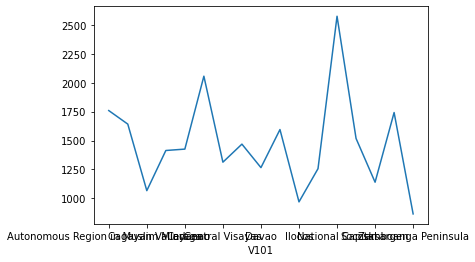

In [5]:
# Default chart of .plot()
region.plot()

A better chart that will help visually compare values across categories is a bar chart. We can make a bar chart by setting `kind = bar` argument inside the parenthesis.

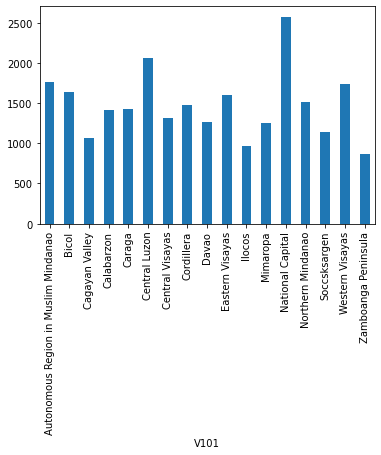

In [6]:
# Make a bar chart using .plot()
region.plot(kind = 'bar')

We can also make it a horizontal bar chart for a better plot orientation. Instead of setting `kind` argument to `bar`, we can set it as `barh`.

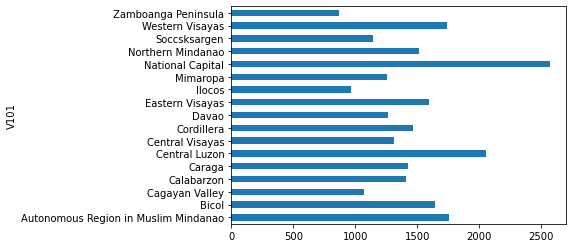

In [7]:
# Make a horizontal bar chart using .plot()

region.plot(kind = 'barh')

Some of the quick plots available in pandas are useful for exploring datasets. Let's try making `histograms` and `box plots` to explore our original `df`.

A histogram is used to summarize numerical data. It is used to illustrate the distribution of the data in a convenient form.

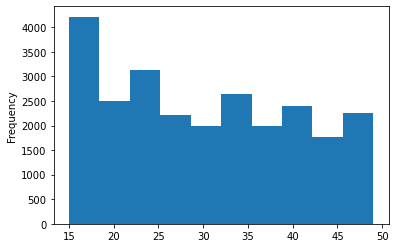

In [8]:
# Make a histogram chart for the age of women respondents using .plot()
df['V012'].plot(kind = 'hist')

Box plots is another chart that show the distribution of numerical data. It highlights the skewness by displaying the data quartiles (or percentiles) and extreme values.

How do we read box plots?

<img src=https://jingwen-z.github.io/images/20190319-boxplot.png width=600 height=600 />

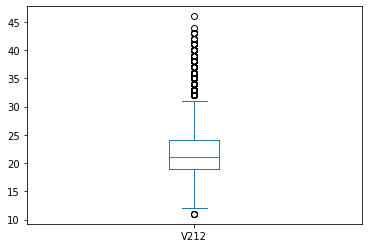

In [9]:
# Make a box plot for age of women respondents at first birth using .plot()
df['V212'].plot(kind='box')

Other kinds of charts available on pandas include the ones listed below. You can try them out by setting their corresponding value for the `kind` argument.

- `area` : Area plot - to show 
- `pie` : Pie plot
- `scatter` : Scatter plot
- `kde`: Kernel Density Estimation plot
- `density` : Same as 'kde'
- `hexbin` : Hexbin plot

## B. Plotting with Matplotlib

When using `.plot`, the features you can customize is limited. A better tool to be able to customize your graphs is by using **Matplotlib**. 

- **Matplotlib** is a python 2D plotting library built on the top of the basic Python language and Numpy.

Let's begin by discussing the parts of a graph.

<img src='https://matplotlib.org/3.3.3/_images/anatomy.png'>

### 1. Bar Graph

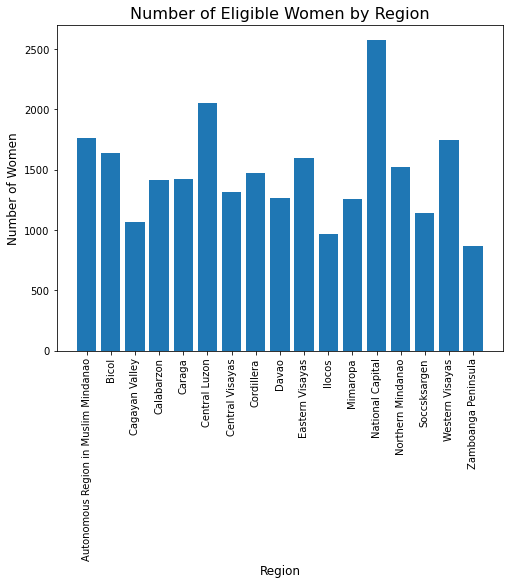

In [15]:
# indicates if plotting on the figues or on subplots
plt.figure(figsize = (8,6))

# the main code to create the graph
plt.bar(region.index, region.values)

# additional elements that can be customized
plt.title('Number of Eligible Women by Region', fontsize = 16)
plt.xlabel('Region', fontsize = 12)
plt.ylabel('Number of Women', fontsize = 12)
plt.xticks(rotation = 90)

# display graph
plt.show()

Unlike our first example, we can add more features to matplotlib. Here we've set the figure size and added titles and axis labels to improve the graph.

### 2. Histograms

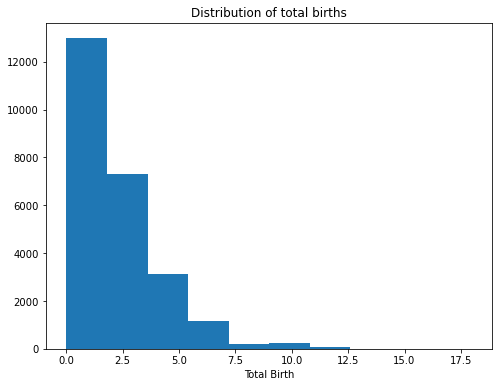

In [16]:
# Plot histogram of total births

plt.figure(figsize = (8,6))
plt.hist(df['V201'])
plt.title('Distribution of total births')
plt.xlabel('Total Birth')

plt.show()

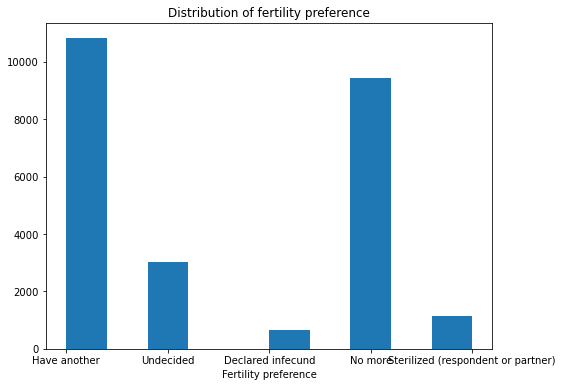

In [17]:
# What if we plot hist for catehorical data
# V602 - Fertility preference

plt.figure(figsize = (8,6))
plt.hist(df['V602'])
plt.title('Distribution of fertility preference')
plt.xlabel('Fertility preference')

plt.show()

### 3. Scatterplot

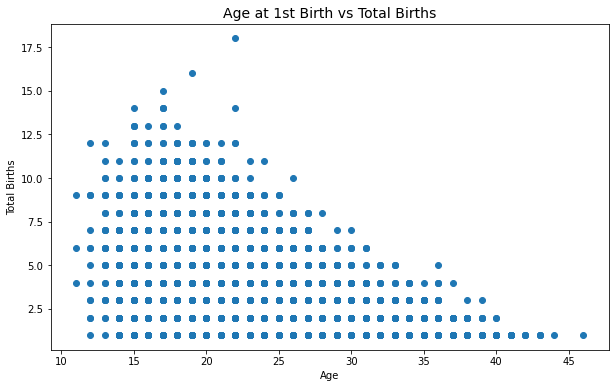

In [18]:
# Make a scatter plot of age first birth versus total births

plt.figure(figsize = (10,6))
plt.scatter(df['V212'], df['V201'])
plt.title("Age at 1st Birth vs Total Births", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Total Births")
plt.show()

### 4. Pie Chart

In [19]:
# Show breakdown of women respondents by educational attainment
# V149 - Educational Attainment

educ_att = df.groupby('V149').size()
educ_att

V149
Complete primary        1902
Complete secondary      6136
Don't know                 1
Higher                  8488
Incomplete primary      1951
Incomplete secondary    6283
No education             313
dtype: int64

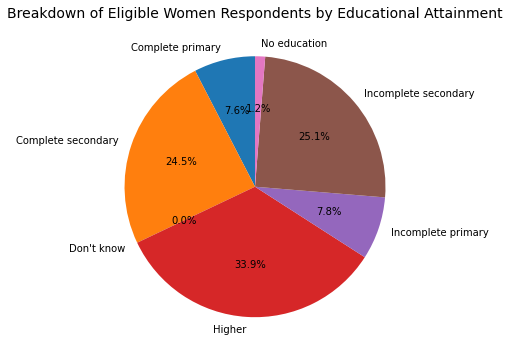

In [27]:
# Make a pie chart
plt.figure(figsize=(6,6))

plt.pie(educ_att, labels = educ_att.index, autopct='%1.1f%%', startangle=90)
plt.title("Breakdown of Eligible Women Respondents by Educational Attainment", fontsize=14)

plt.show()

### 5. Creating Multiple Subplots in One Figure

- To create multiple plots, you need to set the number of subplots and identify the the axes.

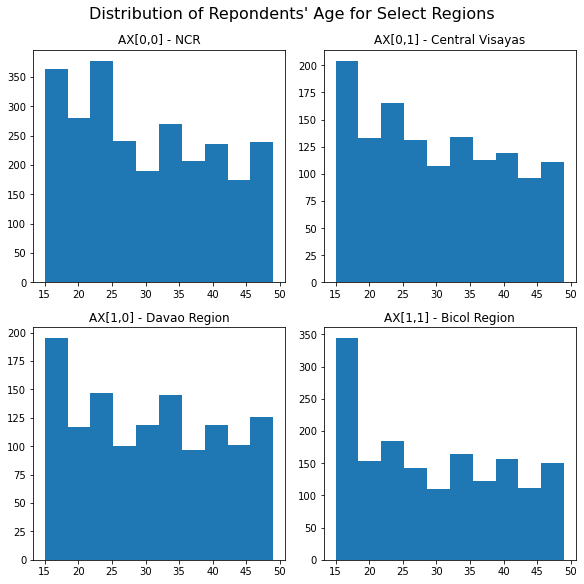

In [24]:
# V101 - Region, V012 - Respondent's age

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8),  constrained_layout=True)

ncr = df[df["V101"]=="National Capital"]
cen_vis =df[df["V101"]=="Central Visayas"]
davao = df[df["V101"]=="Davao"]
bicol = df[df["V101"]=="Bicol"]

axes[0,0].hist(ncr['V012']) 
axes[0,0].set_title("AX[0,0] - NCR")
axes[0,1].hist(cen_vis['V012']) 
axes[0,1].set_title('AX[0,1] - Central Visayas')
axes[1,0].hist(davao['V012']) 
axes[1,0].set_title('AX[1,0] - Davao Region')
axes[1,1].hist(bicol['V012']) 
axes[1,1].set_title('AX[1,1] - Bicol Region')

fig.suptitle("Distribution of Repondents' Age for Select Regions", fontsize=16)
plt.show()